In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os
import math
import sys
sys.path.append('/Users/pavlova92/Desktop/Springboard') 
from sb_utils import save_file
from datasets import load_dataset

In [140]:
# Load the Waymo estimates dataset
df_waymo = load_dataset("purav/waymo_ride_estimates")  
df_waymo = df_waymo['train'].to_pandas()

In [ ]:
#df_reddit_waymo = pd.read_csv('https://docs.google.com/spreadsheets/d/1lYhQeVP-9Ts_cSKiWYnQi_YDb_HEUF8VsXvgmdnDjEY/export?format=csv')
#df_geo = pd.read_json('/Users/pavlova92/Downloads/archive-14/sf_neighborhoods.geojson')
#df_locations = pd.read_csv('/Users/pavlova92/Downloads/archive-14/sf_locations.csv')

In [142]:
#defining a function for basic data exploriation with the main methods of EDA 
def data_exploiation(dataset):
    print(" Shape:")
    print(f"Rows: {dataset.shape[0]} | Columns: {dataset.shape[1]}")
    print("\n Column Names:")
    print(dataset.columns)
    
    print("\n Data Types:")
    print(dataset.dtypes)
    
    print("\n Missing Values:")
    missing = dataset.isnull().sum()
    print(missing[missing > 0].sort_values(ascending=False))
    
    print("\n Memory Usage:")
    mem = dataset.memory_usage(deep=True).sum() / (1024 ** 2)
    print(f"{mem:.2f} MB")
    
    print("\n Descriptive Stats (Numerical):")
    print(dataset.describe().T)
    
    print("\n Unique Values per Column:")
    print(dataset.nunique())
    
    
    print("\n Duplicate Rows:")
    print(dataset.duplicated().sum())

In [143]:
#calling the function on our dataset
data_exploiation(df_waymo)

 Shape:
Rows: 57103 | Columns: 21

 Column Names:
Index(['request_timestamp', 'pickup_name', 'pickup_neighborhood',
       'pickup_latitude', 'pickup_longitude', 'pickup_time', 'pickup_date',
       'pickup_wait_time_mins', 'dropoff_name', 'dropoff_neighborhood',
       'dropoff_latitude', 'dropoff_longitude', 'dropoff_time', 'dropoff_date',
       'trip_duration_mins', 'price_usd', 'price_currency', 'current_time',
       'current_date', 'timezone', 'city'],
      dtype='object')

 Data Types:
request_timestamp         object
pickup_name               object
pickup_neighborhood       object
pickup_latitude          float64
pickup_longitude         float64
pickup_time               object
pickup_date               object
pickup_wait_time_mins      int64
dropoff_name              object
dropoff_neighborhood      object
dropoff_latitude         float64
dropoff_longitude        float64
dropoff_time              object
dropoff_date              object
trip_duration_mins         int64
price

In [144]:
# renaming columns for clarity
df_waymo.rename(columns={'request_timestamp': 'time_request', 'pickup_time':'time_pickup', 'dropoff_time':'time_dropoff'}, inplace=True) # renaming columns for clarity

In [145]:
df_waymo.drop(columns=['current_date', 'current_time', 'timezone', 'city', 'price_currency'], inplace=True)  # dropping unnecessary columns

In [146]:
df_waymo['time_request'] = pd.to_datetime(df_waymo['time_request'], format='%Y-%m-%d %H:%M:%S') 
df_waymo['pickup_date'] = pd.to_datetime(df_waymo['pickup_date'], format='%m/%d/%Y')
df_waymo['dropoff_date'] = pd.to_datetime(df_waymo['dropoff_date'], format='%m/%d/%Y')
# converting the datestamp columns to datetime format

In [147]:
df_waymo['pickup_hour'] = pd.to_datetime(df_waymo['time_pickup'], format="%H:%M").dt.hour
#  extracting the hour from the time_pickup column

In [148]:
df_waymo['weekday_num'] = df_waymo['pickup_date'].dt.weekday
# extracting the weekday number from the pickup_date column (0=Monday, 6=Sunday)

In [149]:
df_waymo['is_weekend'] = df_waymo['weekday_num'].apply(lambda x: 1 if x>=5 else 0)
# creating a new column to indicate whether the pickup date is on a weekend (1) or not (0)

In [150]:
len(df_waymo[df_waymo['is_weekend']==1])/len(df_waymo)
# calculating the percentage of rides on weekends

0.27714831094688547

In [151]:
df_waymo.dtypes

time_request             datetime64[ns]
pickup_name                      object
pickup_neighborhood              object
pickup_latitude                 float64
pickup_longitude                float64
time_pickup                      object
pickup_date              datetime64[ns]
pickup_wait_time_mins             int64
dropoff_name                     object
dropoff_neighborhood             object
dropoff_latitude                float64
dropoff_longitude               float64
time_dropoff                     object
dropoff_date             datetime64[ns]
trip_duration_mins                int64
price_usd                       float64
pickup_hour                       int32
weekday_num                       int32
is_weekend                        int64
dtype: object

In [152]:
df_waymo.describe().T

,count,mean,min,25%,50%,75%,max,std
time_request,57103,2025-02-09 09:00:28.151725824,2025-01-17 16:59:34,2025-01-29 18:09:34,2025-02-10 06:02:02,2025-02-20 12:01:40,2025-03-06 11:52:56,NaN
pickup_latitude,57103.0,37.761121,37.708782,37.737362,37.762033,37.784466,37.809663,0.026885
pickup_longitude,57103.0,-122.438297,-122.511589,-122.461255,-122.435036,-122.413134,-122.366921,0.032431
pickup_date,57103,2025-02-08 19:00:15.824037376,2025-01-17 00:00:00,2025-01-29 00:00:00,2025-02-10 00:00:00,2025-02-20 00:00:00,2025-03-06 00:00:00,NaN
pickup_wait_time_mins,57103.0,5.739523,1.0,3.0,5.0,8.0,33.0,4.117903
dropoff_latitude,57103.0,37.761522,37.708782,37.738333,37.763303,37.784466,37.809663,0.026766
dropoff_longitude,57103.0,-122.437717,-122.511589,-122.460256,-122.434692,-122.413121,-122.366921,0.032262
dropoff_date,57103,2025-02-08 19:34:41.144598784,2025-01-17 00:00:00,2025-01-29 00:00:00,2025-02-10 00:00:00,2025-02-20 00:00:00,2025-03-06 00:00:00,NaN
trip_duration_mins,57103.0,21.969949,0.0,15.0,21.0,29.0,66.0,9.813408
price_usd,57103.0,19.730289,4.55,14.62,18.62,23.64,61.61,7.060985


Text(0.5, 1.0, 'Distribution of Trip Durations')

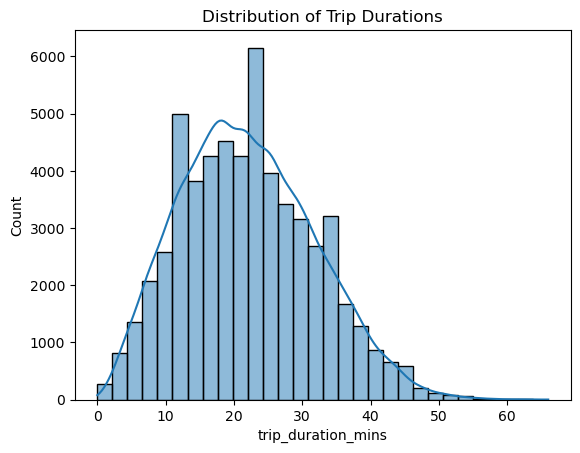

In [153]:
#distribution of trip durations 
sns.histplot(df_waymo['trip_duration_mins'], bins=30, kde=True)
plt.title('Distribution of Trip Durations')

In [154]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 3956  # Radius of Earth in miles
    return c * r
# Definin a functiuon that calculates the distance between two points given their latitude and longitude

In [155]:
df_waymo['distance_miles'] = df_waymo.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
#  calculating the distance in miles between pickup and dropoff locations using the haversine function

Text(0.5, 0, 'Distance (Miles)')

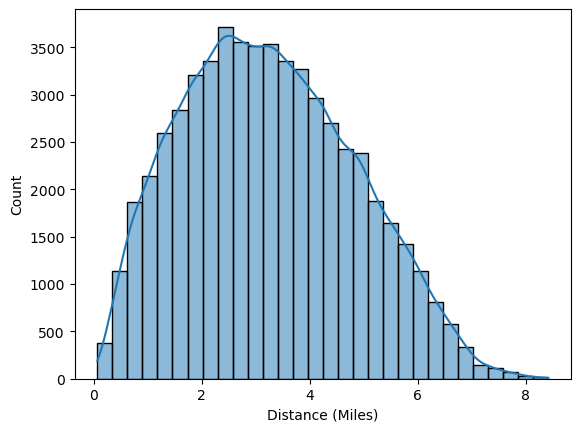

In [156]:
sns.histplot(df_waymo['distance_miles'], bins=30, kde=True)
plt.xlabel('Distance (Miles)')
# Distance distribution

## Distance Distribution Insight

- The distance‐histogram shows that the **vast majority of trips are under 6 miles**, with a peak around 2-4 miles.  
- Trips longer than 6 miles become increasingly rare, and nearly none exceed 8 miles.  

**Interpretation:**  
This reflects typical intra-city usage in San Francisco—most riders book short to medium-length routes. 

In [158]:
df_waymo['speed_mph'] = np.where(df_waymo['trip_duration_mins'] > 0,df_waymo['distance_miles'] / (df_waymo['trip_duration_mins'] / 60),0) # calculating speed in miles per hour

Text(0.5, 1.0, 'Distribution of Speed (mph)')

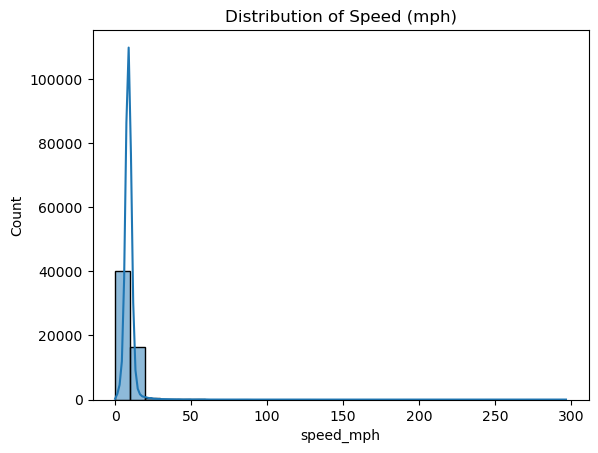

In [159]:
sns.histplot(df_waymo['speed_mph'], bins=30, kde=True)
plt.title('Distribution of Speed (mph)')

## Speed Outlier Analysis

- **Observation:** The 75th percentile of `speed_mph` is less than **11 mph**, so 75 % of trips travel at or below this speed.  
Let's see if we can cut the outluers 

  

In [160]:
speed75 = df_waymo['speed_mph'].quantile(0.75)
high_speed_trips = df_waymo[df_waymo['speed_mph'] > speed75]  # filtering out trips with speed greater than the 75th percentile
high_speed_trips.describe().T

,count,mean,min,25%,50%,75%,max,std
time_request,14276,2025-02-11 00:29:03.528929792,2025-01-17 17:49:14,2025-02-01 03:28:51.500000,2025-02-12 22:29:01.500000,2025-02-20 20:48:01.500000,2025-03-06 11:48:44,NaN
pickup_latitude,14276.0,37.750942,37.708782,37.728782,37.745314,37.775791,37.809663,0.0272
pickup_longitude,14276.0,-122.44667,-122.511589,-122.474292,-122.447707,-122.418969,-122.366921,0.035904
pickup_date,14276,2025-02-10 11:42:45.088260096,2025-01-17 00:00:00,2025-02-01 00:00:00,2025-02-12 00:00:00,2025-02-20 00:00:00,2025-03-06 00:00:00,NaN
pickup_wait_time_mins,14276.0,5.381129,1.0,3.0,4.0,7.0,30.0,3.93101
dropoff_latitude,14276.0,37.753972,37.708782,37.731625,37.751987,37.777133,37.809663,0.026821
dropoff_longitude,14276.0,-122.446509,-122.511589,-122.474292,-122.447462,-122.418938,-122.366921,0.036129
dropoff_date,14276,2025-02-10 12:27:26.175399168,2025-01-17 00:00:00,2025-02-01 00:00:00,2025-02-12 00:00:00,2025-02-20 00:00:00,2025-03-06 00:00:00,NaN
trip_duration_mins,14276.0,20.054077,1.0,14.0,20.0,26.0,49.0,8.54259
price_usd,14276.0,18.937244,4.55,14.41,18.08,22.33,55.78,6.391584


Text(0.5, 1.0, 'Distribution of High-Speed Trips (Speed > 75th Percentile)')

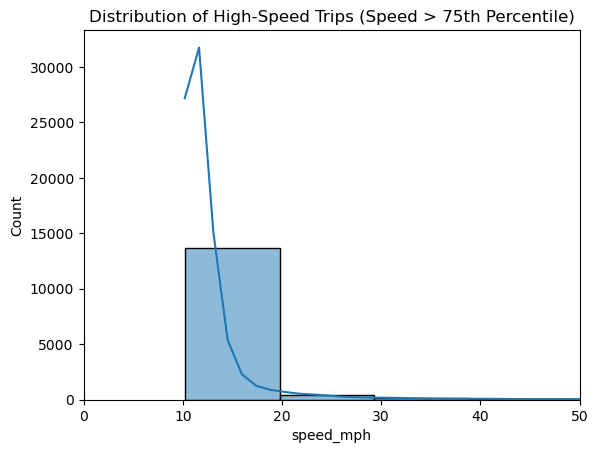

In [161]:
sns.histplot(high_speed_trips['speed_mph'], bins=30, kde=True)
plt.xlim(0, 50)  # limiting x-axis to 50 mph for better visualization
plt.title('Distribution of High-Speed Trips (Speed > 75th Percentile)')

In [162]:
threshold_speed = df_waymo['speed_mph'].quantile(0.99)
threshold_speed.round(2)
# filtering out trips with speed greater than the 99th percentile

20.67

In [163]:
df_waymo = df_waymo[df_waymo['speed_mph']<threshold_speed] # deleting the rows with speed greater than treshold of approximately 20.67 mph

Text(0.5, 1.0, 'Distribution of Speed (mph) (filtered)')

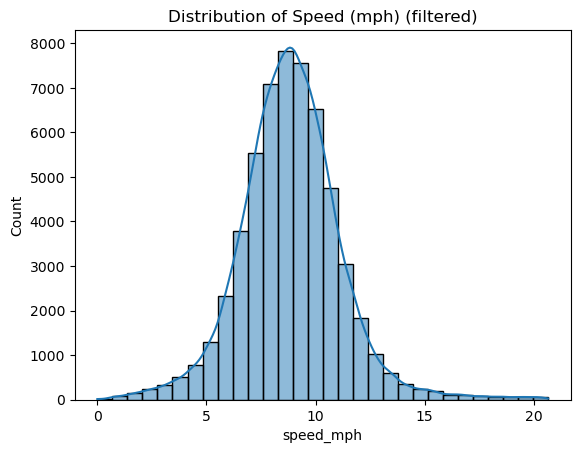

In [164]:
sns.histplot(df_waymo['speed_mph'], bins=30, kde=True)
plt.title('Distribution of Speed (mph) (filtered)')

Text(0.5, 1.0, 'Distribution of Weekdays')

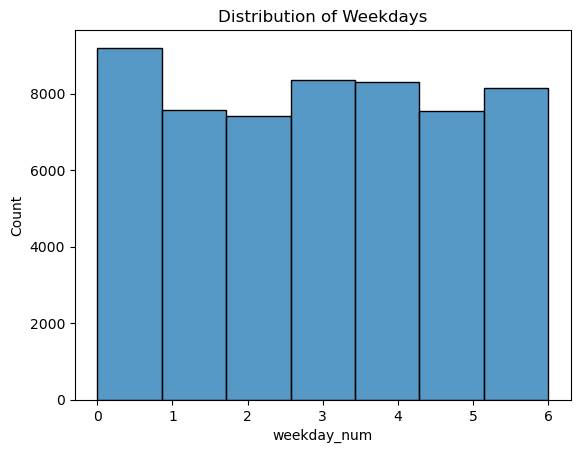

In [165]:
# plotting the distribution of weekdays
sns.histplot(df_waymo['weekday_num'], bins=7)
plt.title('Distribution of Weekdays')


Text(0.5, 0, 'Distribution Pirce (USD)')

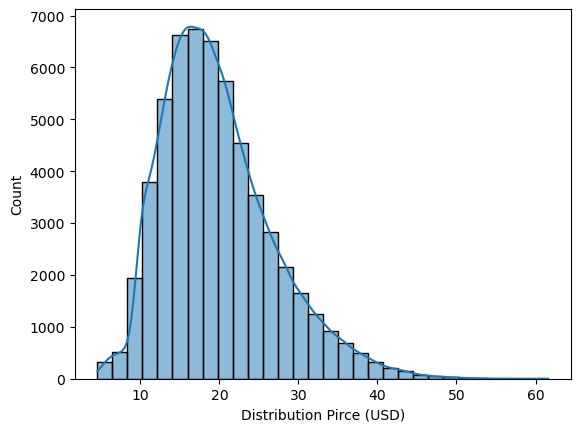

In [166]:
#distribution of price
sns.histplot(df_waymo['price_usd'], bins=30, kde=True)
plt.xlabel('Distribution Pirce (USD)')

Text(0.5, 0, 'Pickup Hour')

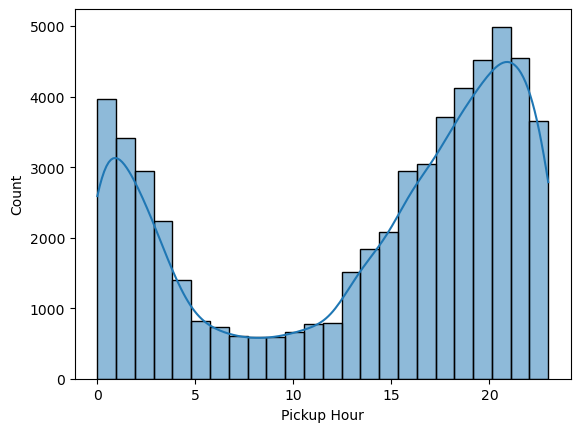

In [167]:

sns.histplot(df_waymo['pickup_hour'], bins=24, kde=True)
plt.xlabel('Pickup Hour')

## Initial Distribution Insights

1. **Hourly Demand Pattern**  
   - The pickup‐hour histogram reveals two clear peaks: one in the early evening (around 16–22 h) and another around midnight.  
   - **Interpretation:** In the evenings and late at night, people tend to be less rushed and more willing to relax. With an autonomous service like Waymo, users who might otherwise drive themselves or work as drivers during the day can opt to ride instead, freeing up their hands and attention.

2. **Trip Duration Distribution**  
   - The vast majority of trips last ** 10–35 minutes**.  
   - **Interpretation:** This reflects an average urban speed that is relatively low—stops, traffic lights, and congestion in San Francisco limit trip speeds, so most journeys fall under half an hour.

3. **Fare Distribution**  
   - The total fare histogram shows that most rides cost **between \$15 and \$25**.  
   - **Interpretation:** This aligns with the typical duration and distance of trips withing the average range.

---


Text(0.5, 1.0, 'Price by Day of Week Boxplot')

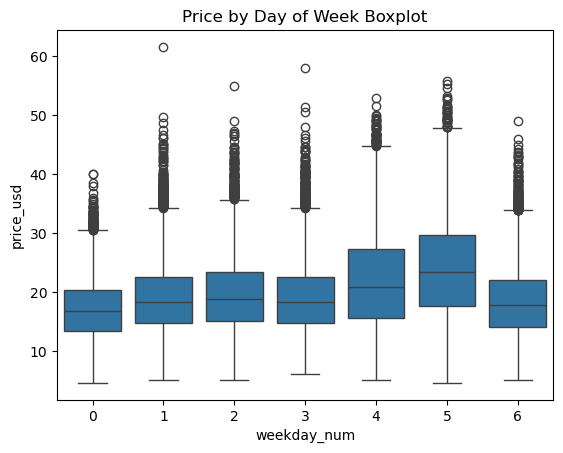

In [168]:
sns.boxplot(x='weekday_num', y='price_usd', data=df_waymo)
plt.title('Price by Day of Week Boxplot')
# Plotting the price by day of the week

Text(0.5, 1.0, 'Price by Day of Week Boxplot')

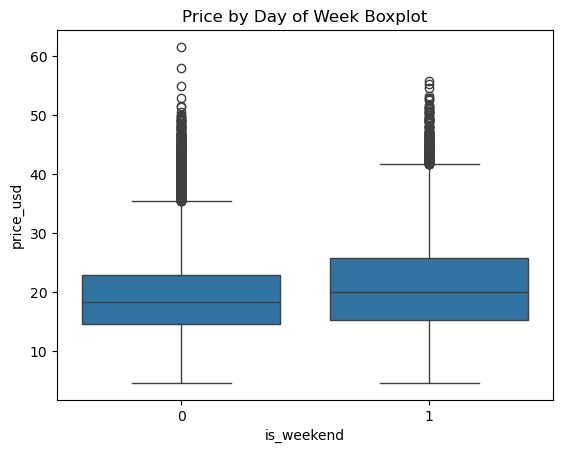

In [169]:
sns.boxplot(x='is_weekend', y='price_usd', data=df_waymo)
plt.title('Price by Day of Week Boxplot')
# Plotting the price by weekend vs. weekday

Sturges: 17 bins


/var/folders/s0/mzj0z0s5637cx3xl_5yngt_00000gn/T/ipykernel_10661/873484679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_waymo['duration_bin'] = pd.cut(x, bins=intervals, include_lowest=True)


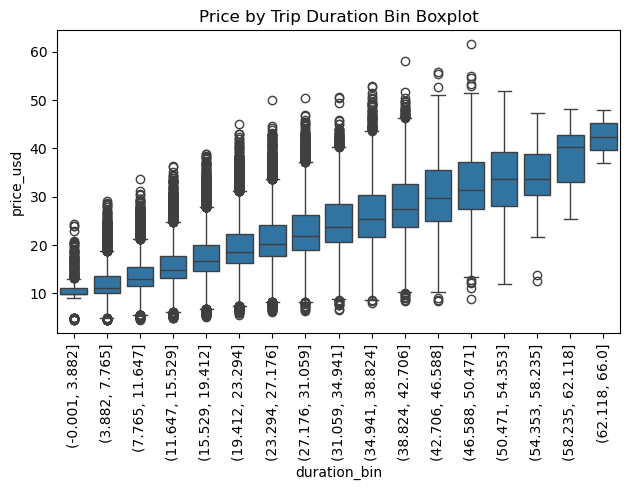

0        16
1        44
2        19
3        33
4        38
         ..
57098    27
57099     9
57100    18
57101    36
57102    44
Name: trip_duration_mins, Length: 56531, dtype: int64


In [170]:
# calculating the optimal number of bins for the histogram using Sturges’ Rule
x= df_waymo['trip_duration_mins']
n = len(x)
k_sturges = math.ceil(np.log2(n)) + 1
print(f"Sturges: {k_sturges} bins")
intervals = np.linspace(x.min(), x.max(), k_sturges+1)
df_waymo['duration_bin'] = pd.cut(x, bins=intervals, include_lowest=True)
sns.boxplot(x='duration_bin', y='price_usd', data=df_waymo)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Price by Trip Duration Bin Boxplot')
plt.show()
print(x)

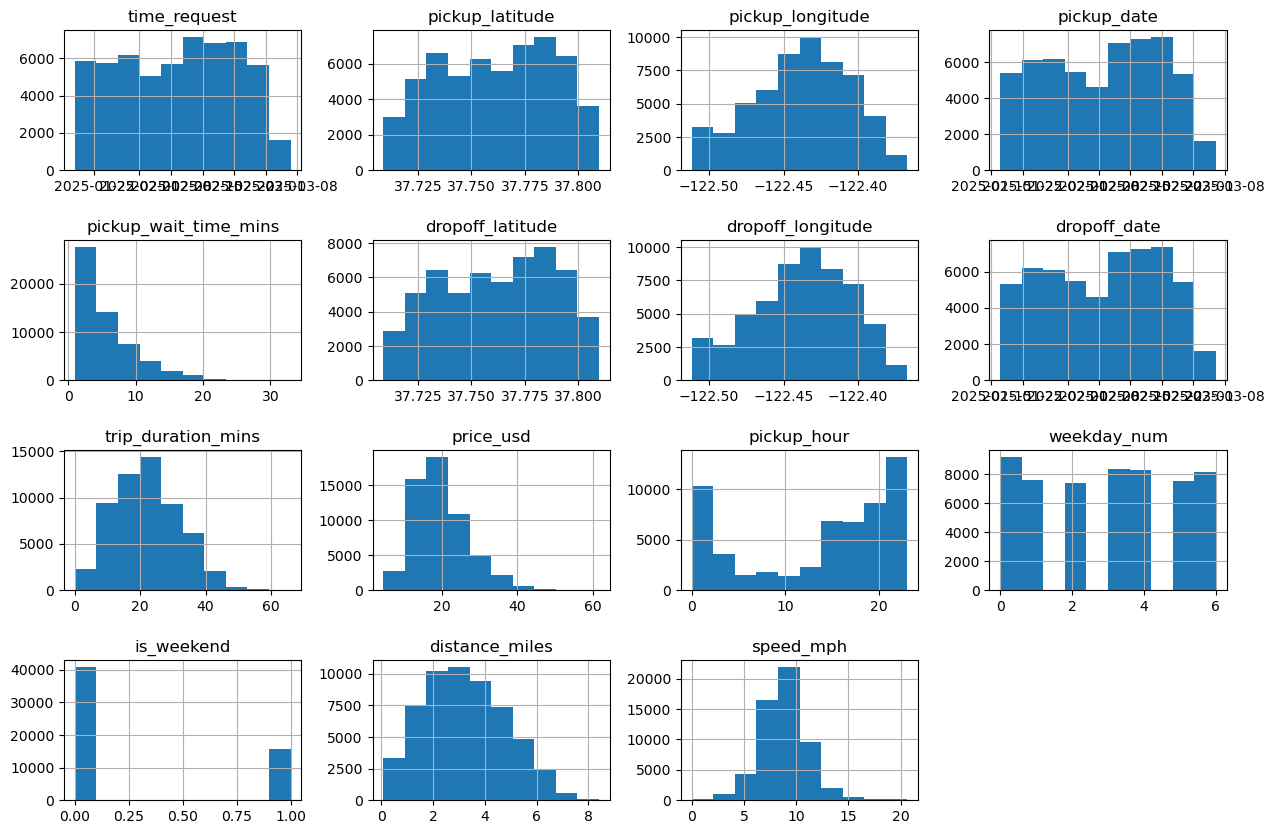

In [171]:
df_waymo.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

### Investigation of Zero-Duration Trips
**We have noticed that there are some trips with zero or short (<5) duration in minutes but with non-zero distance.  
Let’s investigate these trips further to understand what the minimum rate is for using the service, since Waymo doesn’t publish its minimum fare (and does not allow rides with identical pickup and dropoff locations).**


In [172]:
df_waymo[df_waymo['trip_duration_mins'] <=5].describe().T
# filtering out trips with short duration 


,count,mean,min,25%,50%,75%,max,std
time_request,1552,2025-02-09 06:51:03.909793792,2025-01-17 17:49:00,2025-01-30 01:23:55.500000,2025-02-10 20:57:04.500000,2025-02-19 03:34:56.500000,2025-03-06 11:01:32,NaN
pickup_latitude,1552.0,37.763343,37.709184,37.739573,37.766482,37.784964,37.808435,0.025653
pickup_longitude,1552.0,-122.44005,-122.511589,-122.459791,-122.437498,-122.42071,-122.366921,0.028259
pickup_date,1552,2025-02-08 17:31:14.226803968,2025-01-17 00:00:00,2025-01-30 00:00:00,2025-02-10 00:00:00,2025-02-19 00:00:00,2025-03-06 00:00:00,NaN
pickup_wait_time_mins,1552.0,5.001289,1.0,2.0,4.0,6.0,28.0,3.769127
dropoff_latitude,1552.0,37.763658,37.708782,37.739166,37.766482,37.785025,37.809663,0.026018
dropoff_longitude,1552.0,-122.440299,-122.511589,-122.459791,-122.437773,-122.42071,-122.366921,0.028492
dropoff_date,1552,2025-02-08 17:35:52.577319680,2025-01-17 00:00:00,2025-01-30 00:00:00,2025-02-10 00:00:00,2025-02-19 00:00:00,2025-03-06 00:00:00,NaN
trip_duration_mins,1552.0,3.850515,0.0,3.0,4.0,5.0,5.0,1.16894
price_usd,1552.0,11.644884,4.55,9.92,10.25,12.15,28.36,3.390227


In [173]:
min_price_short_trips_night = df_waymo[df_waymo['price_usd'].round(2) == 4.55]
min_price_short_trips_night.shape
# checking the shape of the dataframe with the minimum price: min_price_short_trips

(13, 22)

In [174]:
min_price_short_trips_night.describe().T

,count,mean,min,25%,50%,75%,max,std
time_request,13,2025-01-19 06:11:02.384615424,2025-01-18 03:00:12,2025-01-18 03:15:10,2025-01-20 03:30:15,2025-01-20 05:51:16,2025-01-20 05:53:18,NaN
pickup_latitude,13.0,37.763796,37.714279,37.746185,37.762033,37.780814,37.802225,0.027852
pickup_longitude,13.0,-122.43918,-122.500367,-122.456853,-122.437287,-122.418969,-122.40102,0.027368
pickup_date,13,2025-01-19 01:50:46.153846272,2025-01-18 00:00:00,2025-01-18 00:00:00,2025-01-20 00:00:00,2025-01-20 00:00:00,2025-01-20 00:00:00,NaN
pickup_wait_time_mins,13.0,4.846154,1.0,3.0,3.0,5.0,16.0,4.038278
dropoff_latitude,13.0,37.766128,37.719662,37.752855,37.76924,37.787936,37.797545,0.024738
dropoff_longitude,13.0,-122.442669,-122.508447,-122.447462,-122.437773,-122.427588,-122.407514,0.025253
dropoff_date,13,2025-01-19 01:50:46.153846272,2025-01-18 00:00:00,2025-01-18 00:00:00,2025-01-20 00:00:00,2025-01-20 00:00:00,2025-01-20 00:00:00,NaN
trip_duration_mins,13.0,4.769231,2.0,3.0,4.0,6.0,11.0,2.350668
price_usd,13.0,4.55,4.55,4.55,4.55,4.55,4.55,0.0


### Trip Distance Insight 
**From our analysis, 75 % of short trips span no more than one mile.  Now, let’s take a closer look at the remaining 25 %—the rides longer than one mile—to see if they reveal any meaningful patterns.  Notably, every one of these short trips with a minimum rate takes place between 3 AM and 6 AM.**

In [176]:
min_price_short_trips_night[min_price_short_trips_night['distance_miles']>  1].describe().T
#confirming that the trips with the minimum price has a distance less than  1 miles so we can treat those that >1  as outliers


,count,mean,min,25%,50%,75%,max,std
time_request,2,2025-01-18 03:08:28.500000,2025-01-18 03:00:12,2025-01-18 03:04:20.249999872,2025-01-18 03:08:28.500000,2025-01-18 03:12:36.750000128,2025-01-18 03:16:45,NaN
pickup_latitude,2.0,37.768697,37.761923,37.76531,37.768697,37.772084,37.775471,0.00958
pickup_longitude,2.0,-122.409994,-122.418969,-122.414482,-122.409994,-122.405507,-122.40102,0.012692
pickup_date,2,2025-01-18 00:00:00,2025-01-18 00:00:00,2025-01-18 00:00:00,2025-01-18 00:00:00,2025-01-18 00:00:00,2025-01-18 00:00:00,NaN
pickup_wait_time_mins,2.0,2.0,1.0,1.5,2.0,2.5,3.0,1.414214
dropoff_latitude,2.0,37.778588,37.76924,37.773914,37.778588,37.783262,37.787936,0.01322
dropoff_longitude,2.0,-122.417205,-122.426896,-122.422051,-122.417205,-122.41236,-122.407514,0.013705
dropoff_date,2,2025-01-18 00:00:00,2025-01-18 00:00:00,2025-01-18 00:00:00,2025-01-18 00:00:00,2025-01-18 00:00:00,2025-01-18 00:00:00,NaN
trip_duration_mins,2.0,8.5,6.0,7.25,8.5,9.75,11.0,3.535534
price_usd,2.0,4.55,4.55,4.55,4.55,4.55,4.55,0.0


In [177]:
# creating a mask for outliers based on trip duration and distance
mask_outliers_short_trips_night = ((df_waymo['trip_duration_mins'] <= 5) &(df_waymo['distance_miles']    >  1))

# sanity check: this should be bool dtype
print(mask_outliers_short_trips_night.dtype)   # should print "bool"

# filter via .loc and invert with ~
df_waymo = df_waymo.loc[~mask_outliers_short_trips_night].reset_index(drop=True)


bool


In [178]:
short_trips = df_waymo[(df_waymo['trip_duration_mins'] <= 5) &(df_waymo['distance_miles']  <= 1)] 
short_trips.describe().T
# filtering out trips with short duration and distance less than 1 mile

,count,mean,min,25%,50%,75%,max,std
time_request,1478,2025-02-09 03:51:11.054803712,2025-01-17 17:49:00,2025-01-30 01:01:12,2025-02-10 18:15:26,2025-02-19 00:00:18,2025-03-06 11:01:32,NaN
pickup_latitude,1478.0,37.763595,37.709184,37.739663,37.768086,37.784961,37.808435,0.025542
pickup_longitude,1478.0,-122.439504,-122.511589,-122.459003,-122.435518,-122.419323,-122.366921,0.028233
pickup_date,1478,2025-02-08 14:32:57.807848448,2025-01-17 00:00:00,2025-01-30 00:00:00,2025-02-10 00:00:00,2025-02-19 00:00:00,2025-03-06 00:00:00,NaN
pickup_wait_time_mins,1478.0,4.988498,1.0,2.0,4.0,6.0,26.0,3.753473
dropoff_latitude,1478.0,37.763924,37.708782,37.739596,37.768018,37.785071,37.809663,0.025869
dropoff_longitude,1478.0,-122.439741,-122.511589,-122.458538,-122.437601,-122.42071,-122.366921,0.028367
dropoff_date,1478,2025-02-08 14:37:50.094722560,2025-01-17 00:00:00,2025-01-30 00:00:00,2025-02-10 00:00:00,2025-02-19 00:00:00,2025-03-06 00:00:00,NaN
trip_duration_mins,1478.0,3.807848,0.0,3.0,4.0,5.0,5.0,1.177373
price_usd,1478.0,11.619323,4.55,9.92,10.21,11.9575,28.36,3.409189


In [179]:
# filtering the dataset by short distance trips to see if we can check the min price for daytime trips
short_trips_day = df_waymo[(df_waymo['distance_miles'] < 1) & (df_waymo['trip_duration_mins'] <= 5) & (~df_waymo['pickup_hour'].between(2, 6))  ]
short_trips.shape

(1478, 22)

In [181]:
short_trips_day.describe().T

,count,mean,min,25%,50%,75%,max,std
time_request,1237,2025-02-08 23:06:48.498787328,2025-01-17 17:49:00,2025-01-29 22:19:39,2025-02-10 07:38:43,2025-02-19 00:01:31,2025-03-06 11:01:32,NaN
pickup_latitude,1237.0,37.76344,37.709184,37.739573,37.766482,37.784961,37.808435,0.025484
pickup_longitude,1237.0,-122.439723,-122.511589,-122.459016,-122.437287,-122.42071,-122.366921,0.02839
pickup_date,1237,2025-02-08 07:57:17.025060608,2025-01-17 00:00:00,2025-01-29 00:00:00,2025-02-10 00:00:00,2025-02-19 00:00:00,2025-03-06 00:00:00,NaN
pickup_wait_time_mins,1237.0,5.282943,1.0,2.0,4.0,7.0,26.0,3.882682
dropoff_latitude,1237.0,37.763681,37.708782,37.739573,37.768018,37.784974,37.809663,0.02594
dropoff_longitude,1237.0,-122.439984,-122.511589,-122.459003,-122.437705,-122.42071,-122.366921,0.02849
dropoff_date,1237,2025-02-08 08:03:06.257073664,2025-01-17 00:00:00,2025-01-29 00:00:00,2025-02-10 00:00:00,2025-02-19 00:00:00,2025-03-06 00:00:00,NaN
trip_duration_mins,1237.0,3.789814,0.0,3.0,4.0,5.0,5.0,1.188317
price_usd,1237.0,12.041326,9.09,9.92,10.42,12.78,28.36,3.401576


In [182]:
min_price_short_trips_day = df_waymo[df_waymo['price_usd'].round(2) == 9.09]
min_price_short_trips_day.shape
# checking the shape of the dataframe with the minimum daytime price: min_price_short_trips_day

(44, 22)

In [183]:
min_price_short_trips_day.describe().T

,count,mean,min,25%,50%,75%,max,std
time_request,44,2025-01-20 00:01:02.204545536,2025-01-17 22:40:20,2025-01-19 15:06:01,2025-01-20 01:23:51,2025-01-20 08:48:27,2025-01-26 02:40:51,NaN
pickup_latitude,44.0,37.768814,37.719884,37.753672,37.771723,37.789604,37.806951,0.023867
pickup_longitude,44.0,-122.441237,-122.509268,-122.460505,-122.438716,-122.424048,-122.389951,0.027276
pickup_date,44,2025-01-19 15:16:21.818181888,2025-01-17 00:00:00,2025-01-19 00:00:00,2025-01-20 00:00:00,2025-01-20 00:00:00,2025-01-26 00:00:00,NaN
pickup_wait_time_mins,44.0,4.659091,1.0,3.0,4.0,6.0,12.0,2.429884
dropoff_latitude,44.0,37.768425,37.720429,37.750779,37.773606,37.789815,37.801924,0.025835
dropoff_longitude,44.0,-122.442173,-122.510045,-122.454602,-122.437393,-122.419064,-122.401109,0.02855
dropoff_date,44,2025-01-19 15:16:21.818181888,2025-01-17 00:00:00,2025-01-19 00:00:00,2025-01-20 00:00:00,2025-01-20 00:00:00,2025-01-26 00:00:00,NaN
trip_duration_mins,44.0,5.704545,1.0,3.0,4.0,7.0,26.0,4.825222
price_usd,44.0,9.09,9.09,9.09,9.09,9.09,9.09,0.0


In [184]:
min_price_short_trips_day[min_price_short_trips_day['distance_miles'] > 1]
#similarly to the previous case, confirming that the trips with the minimum price has a distance less than 1 mile so we can treat those that >1  as outliers


,time_request,pickup_name,pickup_neighborhood,pickup_latitude,pickup_longitude,time_pickup,pickup_date,pickup_wait_time_mins,dropoff_name,dropoff_neighborhood,...,time_dropoff,dropoff_date,trip_duration_mins,price_usd,pickup_hour,weekday_num,is_weekend,distance_miles,speed_mph,duration_bin
545,2025-01-18 00:45:14,USF Lone Mountain,Lone Mountain,37.779278,-122.452058,00:48,2025-01-18,3,The Painted Ladies,Alamo Square,...,00:57,2025-01-18,9,9.09,0,5,1,1.073890,7.159264,"(7.765, 11.647]"
860,2025-01-18 03:17:06,Conservatory of Flowers,Golden Gate Park,37.772619,-122.460256,03:29,2025-01-18,12,Ulloa Elementary School,Parkside,...,03:47,2025-01-18,18,9.09,3,5,1,3.259426,10.864755,"(15.529, 19.412]"
3460,2025-01-20 06:54:15,The Painted Ladies,Alamo Square,37.776253,-122.432756,06:56,2025-01-20,2,UCSF Health St. Mary's Hospital,Lone Mountain,...,07:05,2025-01-20,9,9.09,6,0,0,1.162262,7.748413,"(7.765, 11.647]"
3593,2025-01-20 08:10:27,SF MOMA,South of Market,37.785025,-122.400500,08:21,2025-01-20,11,California St & Polk St,Polk Gulch,...,08:32,2025-01-20,11,9.09,8,0,0,1.167828,6.369972,"(7.765, 11.647]"
9739,2025-01-25 02:28:25,Buena Vista Park,Buena Vista,37.770371,-122.443178,02:31,2025-01-25,3,Francis Scott Key Elementary School,Outer Sunset,...,02:47,2025-01-25,16,9.09,2,5,1,3.330944,12.491042,"(15.529, 19.412]"
10591,2025-01-26 02:40:51,Ortega Branch Library,Outer Sunset,37.751196,-122.498066,02:42,2025-01-26,2,Excelsior Park,Excelsior,...,03:09,2025-01-26,26,9.09,2,6,1,4.126568,9.522849,"(23.294, 27.176]"


In [185]:
# creating a mask for outliers based on trip duration and distance
mask_outliers_short_trips_day = ((df_waymo['trip_duration_mins'] <= 5) &(df_waymo['distance_miles']    >  1))

# sanity check: this should be bool dtype
print(mask_outliers_short_trips_day.dtype)   # should print "bool"

# filter via .loc and invert with ~
df_waymo = df_waymo.loc[~mask_outliers_short_trips_day].reset_index(drop=True)


bool


## Removing Micro-Trip Outliers

We removed trips where `trip_duration_mins ≤ 5` and `distance_miles > 1`, since it is very unlikely to ride more than one mile on the base minimum fare (\$4.55 at night or \$9.09 during the day).

Text(0.5, 1.0, 'Price by Pickup Hour Boxplot')

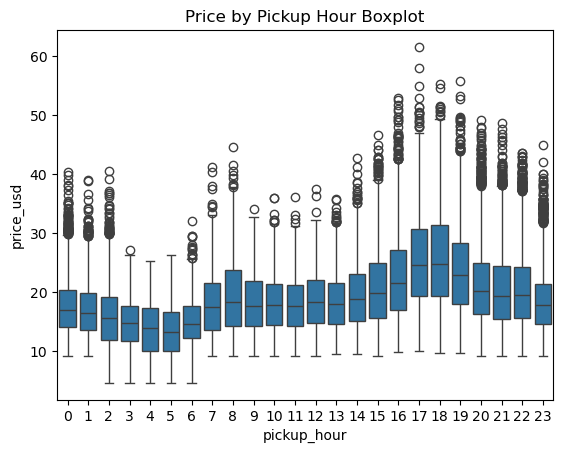

In [186]:
sns.boxplot(x='pickup_hour', y='price_usd', data=df_waymo)
plt.title('Price by Pickup Hour Boxplot')

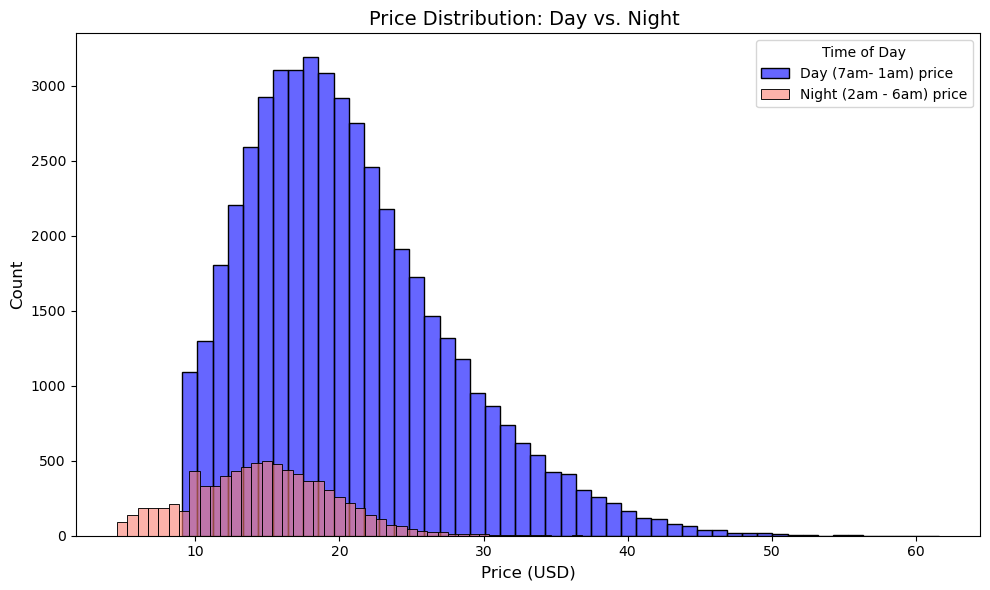

In [187]:
#plotting # the distribution of prices for day and night hours
night_mask = df_waymo['pickup_hour'].between(2, 6)
day_mask   = ~night_mask

plt.figure(figsize=(10,6))

# daytime tris histogram
sns.histplot(df_waymo.loc[day_mask, 'price_usd'],bins=50, color='blue',alpha=0.6,label='Day (7am- 1am) price')

# nighttime trips histogram
sns.histplot(df_waymo.loc[night_mask, 'price_usd'],bins=50,color='salmon', alpha=0.6,label='Night (2am - 6am) price')
plt.xlabel("Price (USD)", fontsize=12)
plt.ylabel("Count",      fontsize=12)
plt.title("Price Distribution: Day vs. Night ", fontsize=14)
plt.legend(title="Time of Day")
plt.tight_layout()
plt.show()

In [188]:
# compute the 5th percentile of price_usd *within* micro-trips by pickup_hour
base_fare = (short_trips.groupby('pickup_hour')['price_usd'].quantile(0.05).reset_index(name='base_fare'))
#confirming that the base fare is calculated correctly
base_fare

,pickup_hour,base_fare
0,0,9.4100
1,1,9.0900
2,2,4.9600
3,3,4.7960
4,4,4.9600
5,5,4.5500
6,6,9.0900
7,7,9.7645
8,8,9.0900
9,9,9.8420


## Key Findings

- **Trip Duration Insight**  
  A histogram of trip durations revealed a significant share of rides lasting **≤ 5 minutes**, so we decided to investigate them further.

- **Micro-Trip Characteristics**  
  Those short trips turned out to be almost exclusively **≤ 1 mile**, confirming they sit entirely within the “base fare” window.

- **Time-of-Day Base Fare**  
  Grouping micro-trips by pickup hour and taking the 5th percentile of their prices, we found two stable base fares:  
  - **Night (2–6 AM):** \$ 4.55  
  - **Day (all other hours):** \$ 9.09  

- **Interpretation**  
  These numbers represent the **minimum charge** before any per-mile or per-minute rates kick in.

In [189]:
df_waymo['price_base'] = np.where(df_waymo['pickup_hour'].between(2,6), 4.55, 9.09) 
df_waymo['price_net'] =  df_waymo['price_usd']- df_waymo['price_base']
# assigning base fare based on pickup hour

In [191]:
df_waymo['price_net'].describe().T

count    56457.000000
mean        11.370220
std          6.757639
min          0.000000
25%          6.410000
50%         10.360000
75%         15.100000
max         52.520000
Name: price_net, dtype: float64

Text(0.5, 0, 'Net Price (USD)')

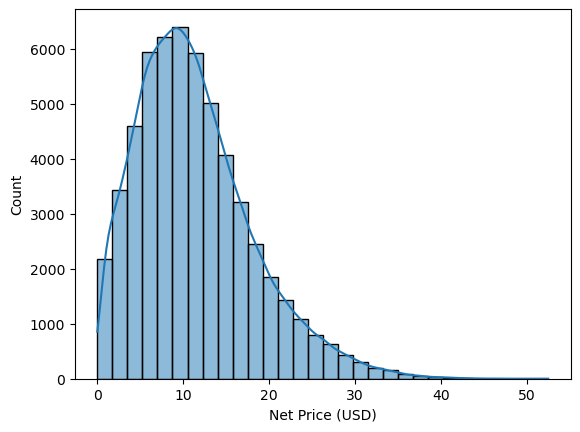

In [192]:
sns.histplot(df_waymo['price_net'], bins=30, kde=True)
plt.xlabel('Net Price (USD)')
# Plotting the distribution of net price 

In [193]:
threshold_price = df_waymo['price_net'].quantile(0.99)
threshold_price.round(2)
# filtering out trips with net price greater than the 99th percentile

31.33

## NetPrice Outlier Analysis

1. **Main Bulk**  
   - The majority of trips have `net_price` in the **\$0–31.33** range.

2. **Small Share of Outliers**  
   - There are rare cases where `net_price` exceeds **\$31.33**.  
   - These outliers can lead to extremely high `price_per_mile` and `price_per_minute` values, introducing noise into our model.

3. **Next Steps**  
   - **Quantify** the outlier proportion: count trips with `net_price > \$31.33`
   - **Investigate** their sources
   - **Decide** which outliers can be removed without compromising data representativeness.

*Cleaning these extreme values will yield more stable variable-rate estimates before building our predictive model.*  

In [194]:
high_price= df_waymo[df_waymo['price_net'] > threshold_price]
high_price.describe().T

,count,mean,min,25%,50%,75%,max,std
time_request,564,2025-02-10 09:30:50.968085248,2025-01-17 18:23:18,2025-02-04 16:44:51.750000128,2025-02-14 17:48:23.500000,2025-02-15 18:30:58.750000128,2025-02-27 08:43:06,NaN
pickup_latitude,564.0,37.772083,37.708782,37.742449,37.783657,37.798274,37.808435,0.030747
pickup_longitude,564.0,-122.442469,-122.511589,-122.477916,-122.437705,-122.410395,-122.366921,0.038668
pickup_date,564,2025-02-09 15:29:21.702127616,2025-01-17 00:00:00,2025-02-04 00:00:00,2025-02-14 00:00:00,2025-02-15 00:00:00,2025-02-27 00:00:00,NaN
pickup_wait_time_mins,564.0,12.656028,1.0,9.0,13.0,16.0,33.0,5.234004
dropoff_latitude,564.0,37.754372,37.709184,37.727945,37.750405,37.782674,37.808435,0.030276
dropoff_longitude,564.0,-122.435106,-122.511589,-122.468888,-122.425392,-122.403019,-122.366921,0.039752
dropoff_date,564,2025-02-09 15:34:28.085106432,2025-01-17 00:00:00,2025-02-04 00:00:00,2025-02-14 00:00:00,2025-02-15 00:00:00,2025-02-27 00:00:00,NaN
trip_duration_mins,564.0,38.700355,20.0,34.0,39.0,44.0,66.0,7.64561
price_usd,564.0,43.821223,36.09,41.59,42.97,45.275,61.61,3.133344


Text(0.5, 1.0, 'High Net Prices (filtered)')

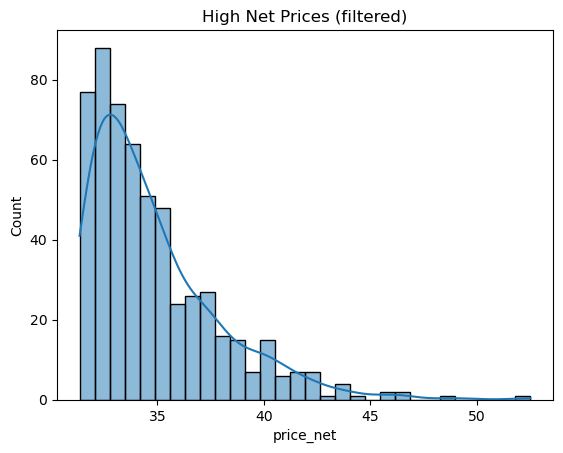

In [195]:
sns.histplot(data=high_price['price_net'], bins=30, kde=True)
plt.title('High Net Prices (filtered)')

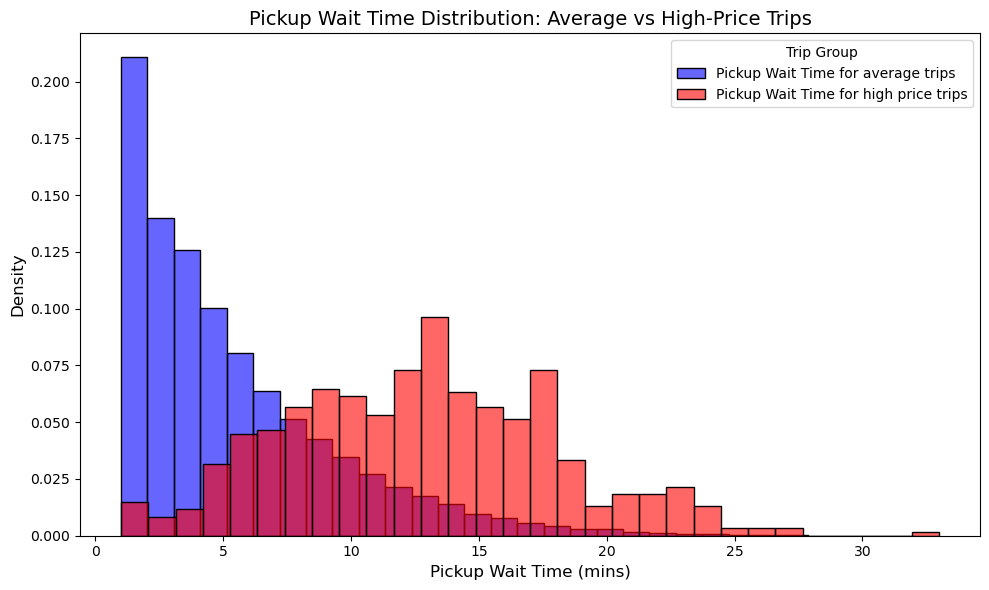

In [196]:

plt.figure(figsize=(10,6))
average_trips = df_waymo[df_waymo['price_net'] <= threshold_price]
# daytime tris histogram
sns.histplot(average_trips['pickup_wait_time_mins'],bins=30, color='blue',alpha=0.6,stat="density", label='Pickup Wait Time for average trips')

# nighttime trips histogram
sns.histplot(high_price['pickup_wait_time_mins'],bins=30,color='red', alpha=0.6, stat="density",common_norm=False, label='Pickup Wait Time for high price trips')
plt.xlabel("Pickup Wait Time (mins)", fontsize=12)
plt.ylabel("Density",               fontsize=12)
plt.title("Pickup Wait Time Distribution: Average vs High-Price Trips", fontsize=14)
plt.legend(title="Trip Group")
plt.tight_layout()
plt.show()

In [197]:
# Calculating the median and mean pickup wait time for average and high-price trips
print(high_price['pickup_wait_time_mins'].median(), high_price['pickup_wait_time_mins'].mean())
print(df_waymo['pickup_wait_time_mins'].median(), df_waymo['pickup_wait_time_mins'].mean())

13.0 12.656028368794326
5.0 5.741768071275484


## Expensive-Trip & Wait-Time Summary

- **Definition of “Expensive Trips”**  
  We flagged any ride with `price_usd` **above the 99th percentile** (our P99 threshold) as an “expensive trip.”

- **Sample Size**  
  These outliers represent only about **1%** of all trips.

- **Key Observation**  
  Every one of these high-price rides also exhibits **much longer pickup wait times**—typically in the **10–20 minute** range, compared to a median of ~5 minutes for all trips.

Text(0.5, 1.0, 'Net Price by Pickup Wait Time Boxplot')

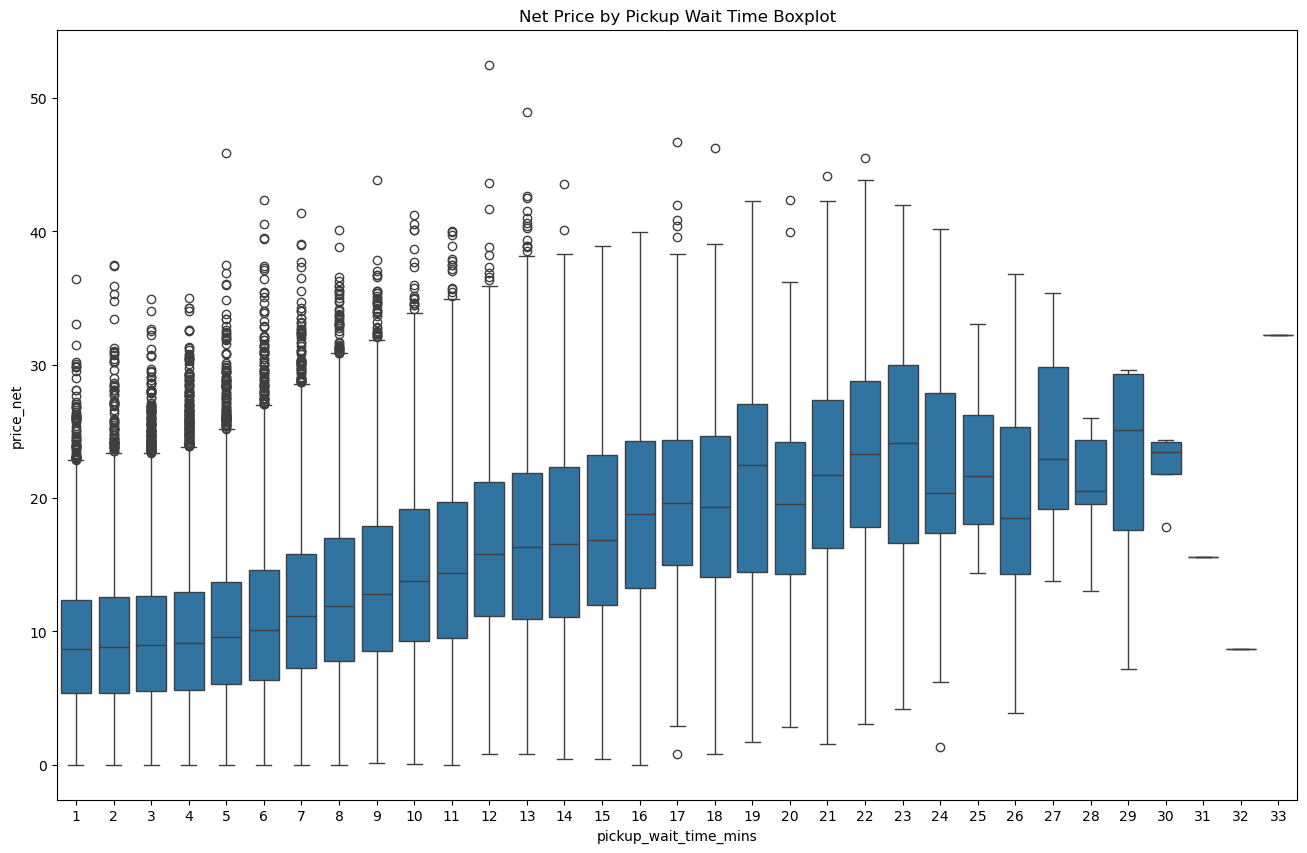

In [198]:
plt.figure(figsize=(16,10))
sns.boxplot(x='pickup_wait_time_mins', y='price_net', data=df_waymo)
plt.title('Net Price by Pickup Wait Time Boxplot')

### Wait-Time Surcharge Analysis

- We plotted **net fare** against **wait time (mins)** and observed nearly a flat line for the first ~3-4 minutes.  
- Beyond ~4 minutes, net fare climbs almost linearly with each extra minute.  
- This implies a ~4 minute free waiting allowance, followed by a fixed per-minute surcharge.  
- Next, we’ll **group by 'pickup_wait_time_mins'**, compute each group’s **median price_net'**, and derive the exact surcharge per additional minute.

In [199]:
threshold_time_wait = df_waymo['pickup_wait_time_mins'].quantile(0.99)
threshold_time_wait.round(2)

19.0

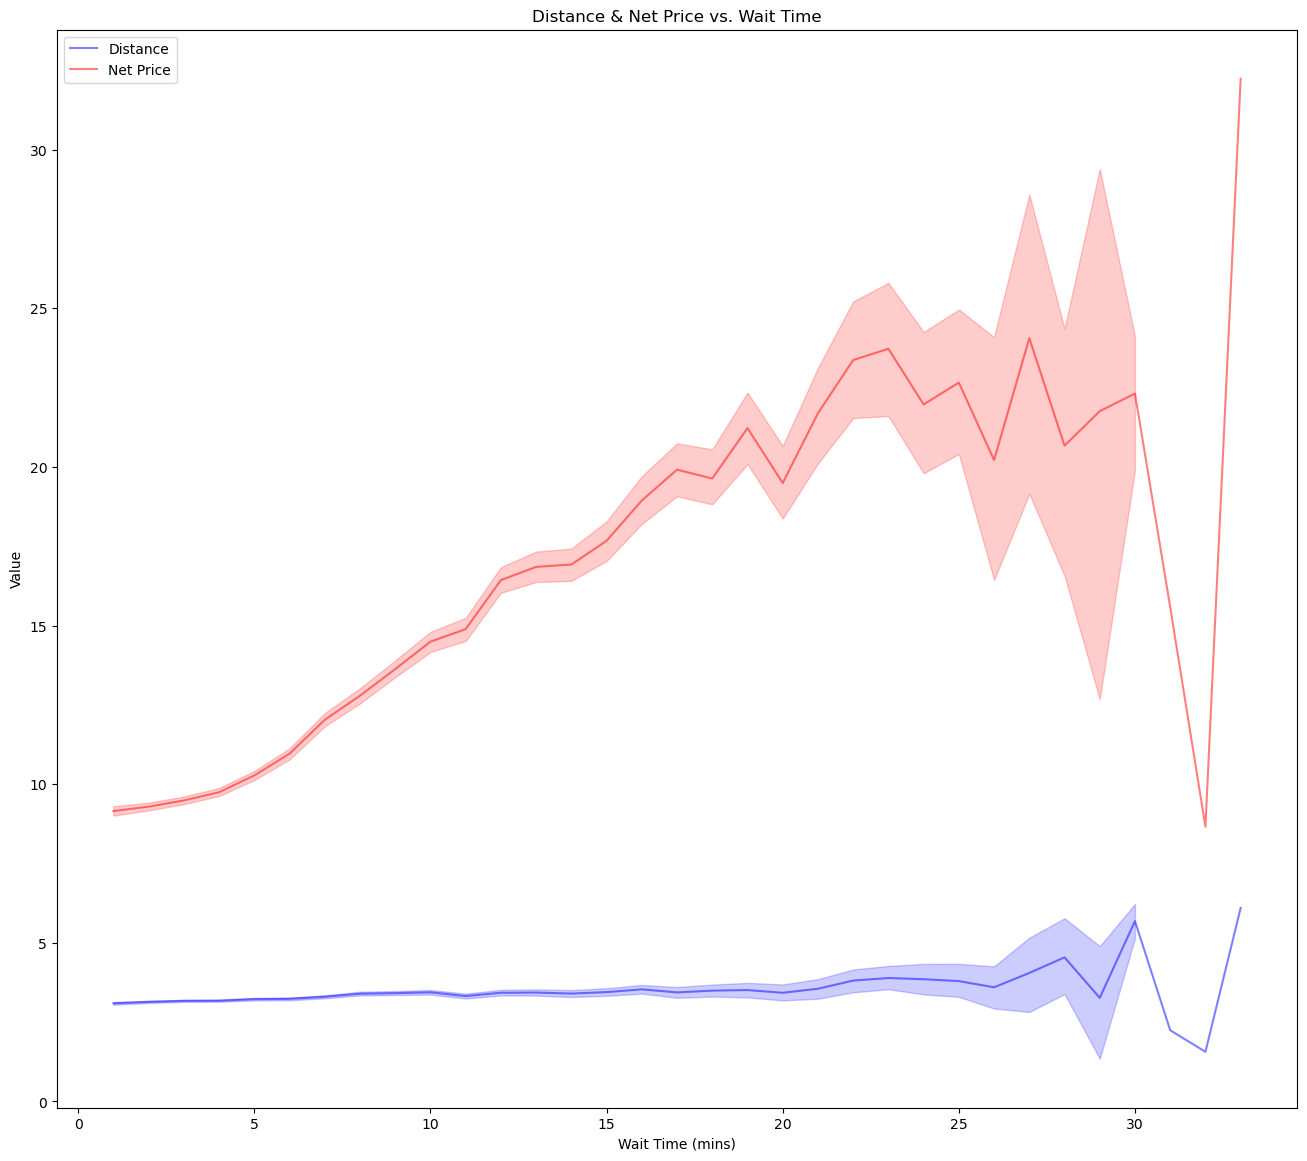

In [200]:

plt.figure(figsize=(16,14))

sns.lineplot(x='pickup_wait_time_mins', y='distance_miles', data=df_waymo, alpha=0.5, color ='blue', label='Distance')
sns.lineplot(x='pickup_wait_time_mins', y='price_net',       data=df_waymo, alpha=0.5, color ='red', label='Net Price')

plt.xlabel("Wait Time (mins)")
plt.ylabel("Value")
plt.title("Distance & Net Price vs. Wait Time")
plt.show()
# Plotting the relationship between pickup wait time vs  distance and price

### Defining Our Wait-Time Window

- **99th-percentile cutoff**: 99 % of all pickups occur within **19 minutes** of request. Beyond 19 min the net-price vs. wait-time curve becomes very noisy, so we exclude longer waits as outliers.  
- **Flat initial segment**: The **first 4 minutes** of wait show virtually no change in median net price (i.e. up to a 4 min “free” waiting allowance).  
- **Analysis window**: Therefore, to estimate a consistent per-minute surcharge, we focus on the **4 – 19 minute** wait-time range.  

In [201]:
short_trips_wait = short_trips[short_trips['pickup_wait_time_mins'].between(4,19 )].copy()
short_trips_wait['price_base'] = np.where(short_trips_wait['pickup_hour'].between(2,6), 4.55, 9.09)
short_trips_wait['price_net'] = short_trips_wait['price_usd'] - short_trips_wait['price_base']
# filtering the short trips dataframe to include only those with pickup wait time between 4 and 19 minutes
wait_summary = (short_trips_wait.groupby('pickup_wait_time_mins').agg(trips = ('price_net', 'size'), median_net = ('price_net', 'median')).reset_index())
# grouping by pickup wait time and calculating the number of trips and median net price
wait_summary


,pickup_wait_time_mins,trips,median_net
0,4,208,1.330
1,5,146,1.550
2,6,125,1.440
3,7,72,2.535
4,8,77,3.040
5,9,47,5.290
6,10,43,3.420
7,11,38,6.060
8,12,19,8.050
9,13,9,8.120


In [202]:
wait_summary = (short_trips_wait.groupby('pickup_wait_time_mins').agg(trips = ('price_net', 'size'), median_net = ('price_net', 'median')).reset_index())
# grouping by pickup wait time and calculating the number of trips and median net price
wait_summary

,pickup_wait_time_mins,trips,median_net
0,4,208,1.330
1,5,146,1.550
2,6,125,1.440
3,7,72,2.535
4,8,77,3.040
5,9,47,5.290
6,10,43,3.420
7,11,38,6.060
8,12,19,8.050
9,13,9,8.120


In [82]:
wait_summary_median = (short_trips_wait.groupby('pickup_wait_time_mins').agg(trips = ('price_net', 'size'), median_net = ('price_net', 'median')).reset_index())
# grouping by pickup wait time and calculating the number of trips and median net price

In [83]:
short_trips_wait.columns

Index(['time_request', 'pickup_name', 'pickup_neighborhood', 'pickup_latitude',
       'pickup_longitude', 'time_pickup', 'pickup_date',
       'pickup_wait_time_mins', 'dropoff_name', 'dropoff_neighborhood',
       'dropoff_latitude', 'dropoff_longitude', 'time_dropoff', 'dropoff_date',
       'trip_duration_mins', 'price_usd', 'pickup_hour', 'weekday_num',
       'is_weekend', 'distance_miles', 'speed_mph', 'duration_bin',
       'price_base', 'price_net'],
      dtype='object')

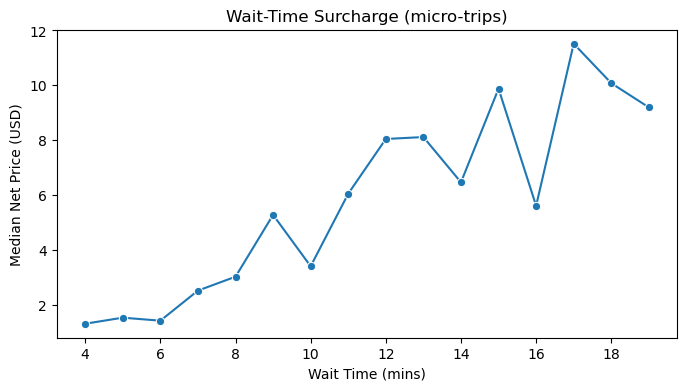

In [203]:
plt.figure(figsize=(8,4))
sns.lineplot(data=wait_summary_median,x='pickup_wait_time_mins',y='median_net',marker='o')
plt.xlabel("Wait Time (mins)")
plt.ylabel("Median Net Price (USD)")
plt.title("Wait-Time Surcharge (micro-trips)")
plt.show()
# Plotting the wait-time surcharge for micro-trips based on pickup wait time


In [204]:
# we will create 4-minutes interval bins (since first 4 minutes are free, we assume thatthere are 4 minutes intervals)
max_wait = df_waymo['pickup_wait_time_mins'].max()
bins = np.arange(0, max_wait + 4, 4)      # [0,4,8,12,…]


labels = [f"{int(i)}–{int(i+4)} min" for i in bins[:-1]]

# creating a bin column for pickup wait time
df_waymo['wait_min_bin'] = pd.cut(df_waymo['pickup_wait_time_mins'],bins=bins,labels=labels,right=False, include_lowest=True)
# grouping by wait time bins and calculating the median net price
median_by_bin = (df_waymo.groupby('wait_min_bin', observed=True)['price_net'].median().reset_index(name='median_net_price'))
median_by_bin['delta_med_price_net'] = median_by_bin['median_net_price'].diff()
print(median_by_bin)

  wait_min_bin  median_net_price  delta_med_price_net
0      0–4 min             8.840                  NaN
1      4–8 min             9.780                0.940
2     8–12 min            12.960                3.180
3    12–16 min            16.285                3.325
4    16–20 min            19.520                3.235
5    20–24 min            21.200                1.680
6    24–28 min            21.445                0.245
7    28–32 min            21.770                0.325
8    32–36 min            20.450               -1.320


In [205]:
# calculating the surcharge per minute based on the median net price difference
median_by_bin['surcharge_per_min'] = median_by_bin['delta_med_price_net'] /4
median_by_bin['surcharge_per_min'].median()
print(f"Median surcharge per minute: {round(median_by_bin['surcharge_per_min'].median(), 2)}")

Median surcharge per minute: 0.33


In [206]:
df_waymo['price_net_var'] = np.where(df_waymo['pickup_wait_time_mins']>4,  (df_waymo['price_net'] - (df_waymo['pickup_wait_time_mins'] * 0.33)), df_waymo['price_net'])
df_waymo['price_net_var'].describe().T
# calculating the price that only depends on distance and time of the ride and excludes the surcharge per minute of waiting time

count    56457.000000
mean         9.901864
std          6.288721
min         -6.600000
25%          5.370000
50%          9.150000
75%         13.540000
max         48.560000
Name: price_net_var, dtype: float64

Text(0.5, 1.0, 'Distribution of Net Price (Variable)')

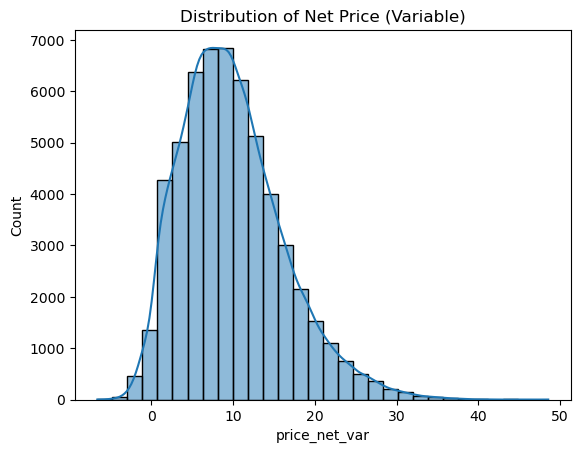

In [207]:
sns.histplot(df_waymo['price_net_var'], bins=30, kde=True)
plt.title('Distribution of Net Price (Variable)')

In [208]:
minus = df_waymo[df_waymo['price_net_var']<0]
minus.describe().T
# checking the trips with negative price values

,count,mean,min,25%,50%,75%,max,std
time_request,1178,2025-02-07 06:31:54.556027136,2025-01-17 18:17:46,2025-01-24 04:30:12.249999872,2025-02-03 21:51:03.500000,2025-02-23 17:55:47.750000128,2025-03-06 11:51:50,NaN
pickup_latitude,1178.0,37.75633,37.708782,37.734154,37.755134,37.778523,37.808435,0.025563
pickup_longitude,1178.0,-122.446348,-122.511589,-122.469355,-122.448565,-122.422848,-122.366921,0.033567
pickup_date,1178,2025-02-06 17:48:23.225806336,2025-01-17 00:00:00,2025-01-24 00:00:00,2025-02-03 00:00:00,2025-02-23 00:00:00,2025-03-06 00:00:00,NaN
pickup_wait_time_mins,1178.0,8.737691,5.0,6.0,8.0,10.75,32.0,3.779831
dropoff_latitude,1178.0,37.758737,37.708782,37.737362,37.75684,37.780279,37.808435,0.025191
dropoff_longitude,1178.0,-122.442394,-122.511589,-122.465278,-122.443178,-122.42071,-122.366921,0.030901
dropoff_date,1178,2025-02-06 17:49:36.570458112,2025-01-17 00:00:00,2025-01-24 00:00:00,2025-02-03 00:00:00,2025-02-23 00:00:00,2025-03-06 00:00:00,NaN
trip_duration_mins,1178.0,9.546689,0.0,6.0,8.0,12.0,49.0,5.796604
price_usd,1178.0,10.110272,4.55,9.92,10.25,11.1475,17.75,2.035535


Text(0.5, 1.0, 'Distribution of Pickup Wait Time for Negative Price Trips')

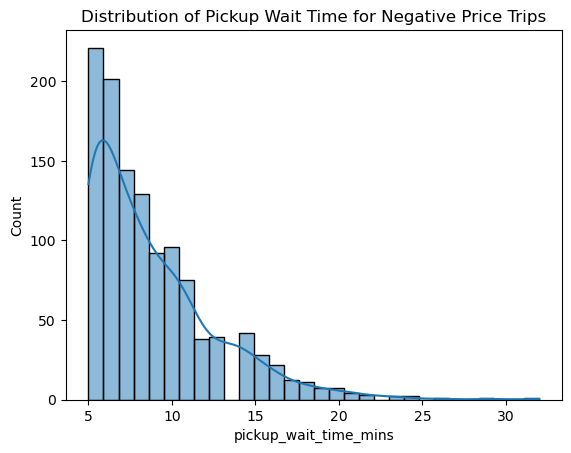

In [209]:
sns.histplot(minus['pickup_wait_time_mins'], bins=30, kde=True)
plt.title('Distribution of Pickup Wait Time for Negative Price Trips')

Text(0.5, 1.0, 'Distribution of Trip Durations for Negative Price Trips')

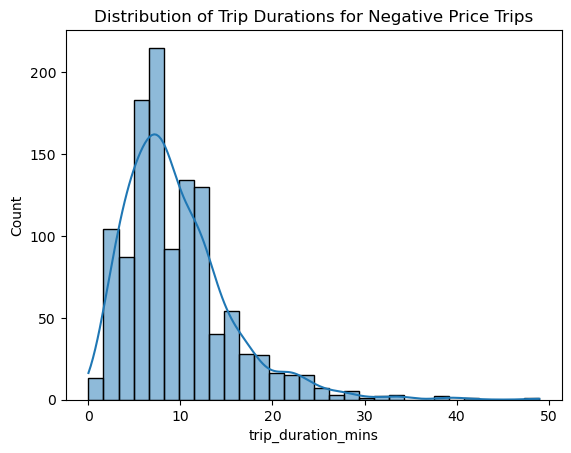

In [210]:
sns.histplot(minus['trip_duration_mins'], bins=30, kde=True)
plt.title('Distribution of Trip Durations for Negative Price Trips')

Text(0.5, 1.0, 'Distribution of Distance for Negative Price Trips')

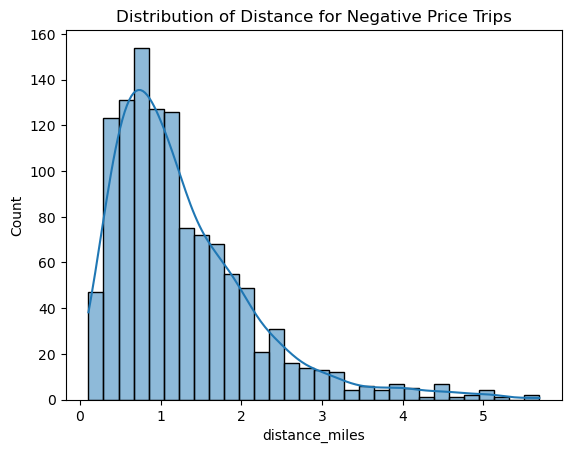

In [211]:
sns.histplot(minus['distance_miles'], bins=30, kde=True)
plt.title('Distribution of Distance for Negative Price Trips')

## Adjusting for Wait-Time Surcharge

- **Free Waiting Window (0–4 min)**  
  Based on our analysis, the first 4 minutes of wait incur no extra charge—the net price remains unchanged.

- **Introducing `price_net_var`**  
  We create a new column, **price_net_var**, defined as:  
  - For trips with **wait ≥ 4 min**:  
    $$\text{price\_net\_var} = \text{price\_net} \;-\; (0.33 \times \text{wait\_mins})$$  
  - For trips with **wait < 4 min**:  
    $$\text{price\_net\_var} = \text{price\_net}$$  
  This subtracts a \$0.33-per-minute surcharge from any minutes beyond the free 4 min.

- **Handling Negative Results**  
  A small group of very short/micro-trips (≤ 1.5-2 mile, ≤ 10 min wait, ≤  2 miles ) produce negative `price_net_var` values—indicating the surcharge oversteps the actual fare. We therefore exclude these outliers from further variable-rate calculations.

---

> **Outcome:**  
> We now have a clean separation between base fare (including up to 4 min of wait) and a consistent \$0.33/min wait surcharge for all eligible trips.

In [212]:
df_clean = df_waymo.loc[df_waymo['price_net_var'] >= 0].copy() 
# saving the dataset with only non-negative variable prices 

In [213]:
#calculatin price per minute and per mile
df_clean['price_per_mile'] = df_clean['price_net'] / df_clean['distance_miles']
df_clean['price_per_minute'] =np.where(df_clean['trip_duration_mins'] > 0, df_clean['price_net'] / df_clean['trip_duration_mins'], 0)

Text(0.5, 0, 'Price per Minute (USD)')

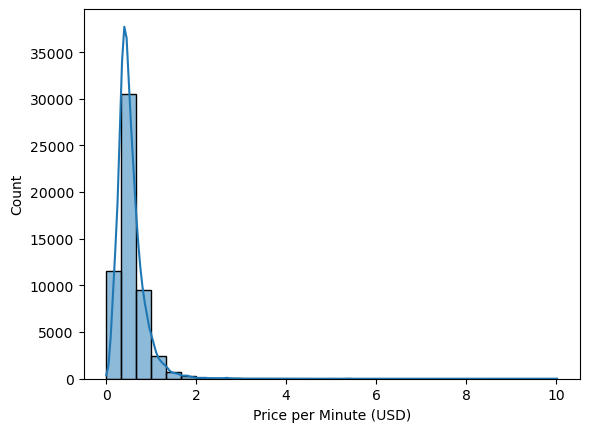

In [214]:
sns.histplot(df_clean['price_per_minute'], bins=30, kde=True)
plt.xlabel('Price per Minute (USD)')
# Plotting the distribution of price per minute

Text(0.5, 1.0, 'Distribution of Price per Mile (USD)')

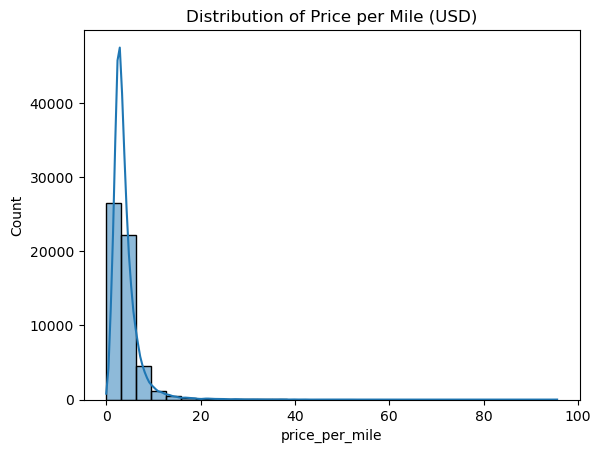

In [215]:
sns.histplot(df_clean['price_per_mile'], bins=30, kde=True)
plt.title('Distribution of Price per Mile (USD)')

In [216]:
threshold_pmile = df_clean['price_per_mile'].quantile(0.99)
df_clean = df_clean[df_clean['price_per_mile'] <= threshold_pmile].copy()
# filtering out trips with price per mile greater than the 99th percentile

In [217]:
threshold_pmin = df_clean['price_per_minute'].quantile(0.99)
df_clean = df_clean[df_clean['price_per_minute']<=threshold_pmin].copy()
# filtering out trips with price per minute greater than the 99th percentile


## Variable Rate Distribution

- **Price per Minute**  
  75 % of trips cost **≤ \$0.63 per minute**.

- **Price per Mile**  
  75 % of trips cost **≤ \$4.45 per mile**.

## Variable Rate Distribution

- **Net Price Range**  
  Most trips have a **net price** (total minus base fare) between **\$0 and \$40**.

- **Price per Minute**  
  75 % of trips cost **< \$1 per minute**.

- **Price per Mile**  
  75 % of trips cost **<\$5 per mile**.

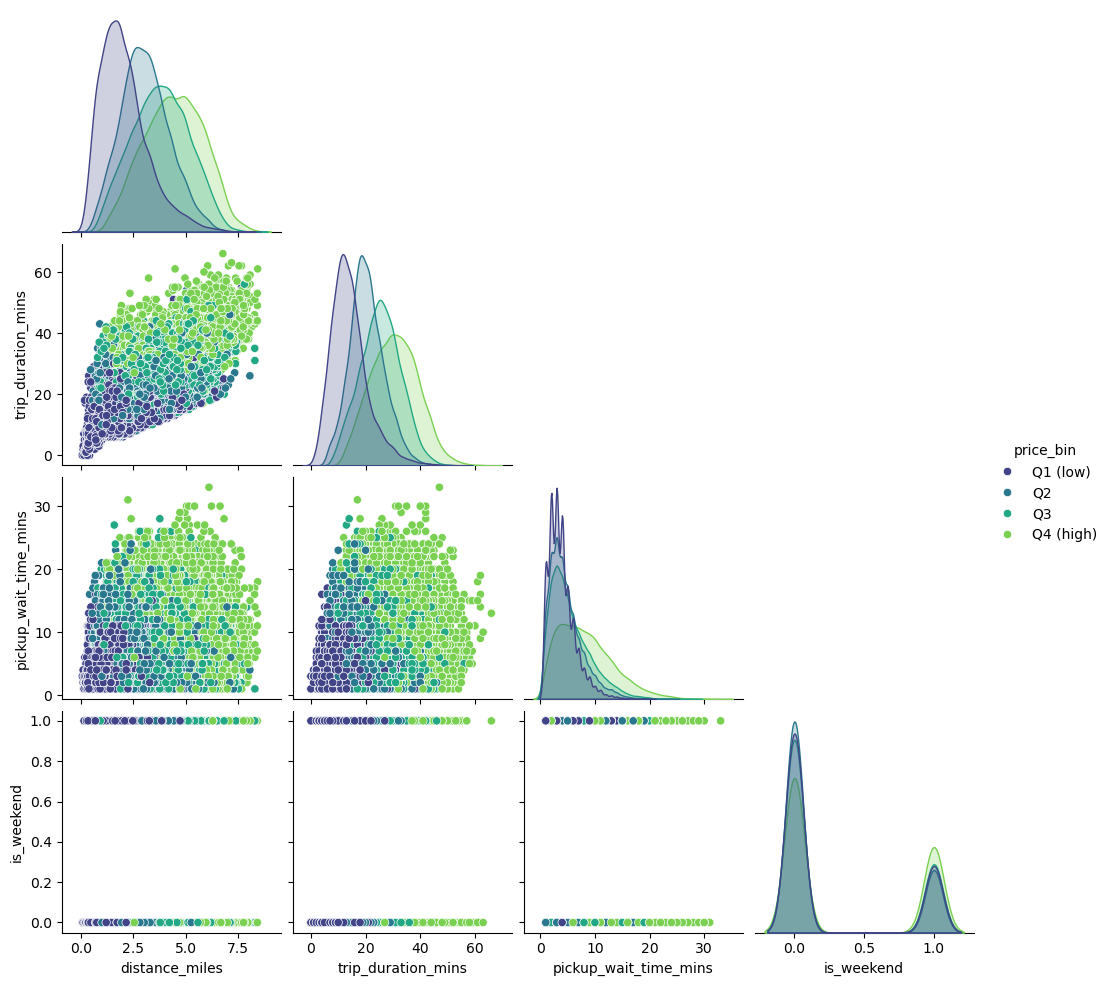

In [218]:
# creating a price‐bin column (quartiles)
df_clean['price_bin'] = pd.qcut(df_clean['price_usd'],q=4,labels=["Q1 (low)", "Q2", "Q3", "Q4 (high)"])

# pairplot with hue=price_bin
sns.pairplot(df_clean,vars=['distance_miles', 'trip_duration_mins', 'pickup_wait_time_mins', 'is_weekend'], hue='price_bin', diag_kind='kde', corner=True, palette="viridis")

<Axes: >

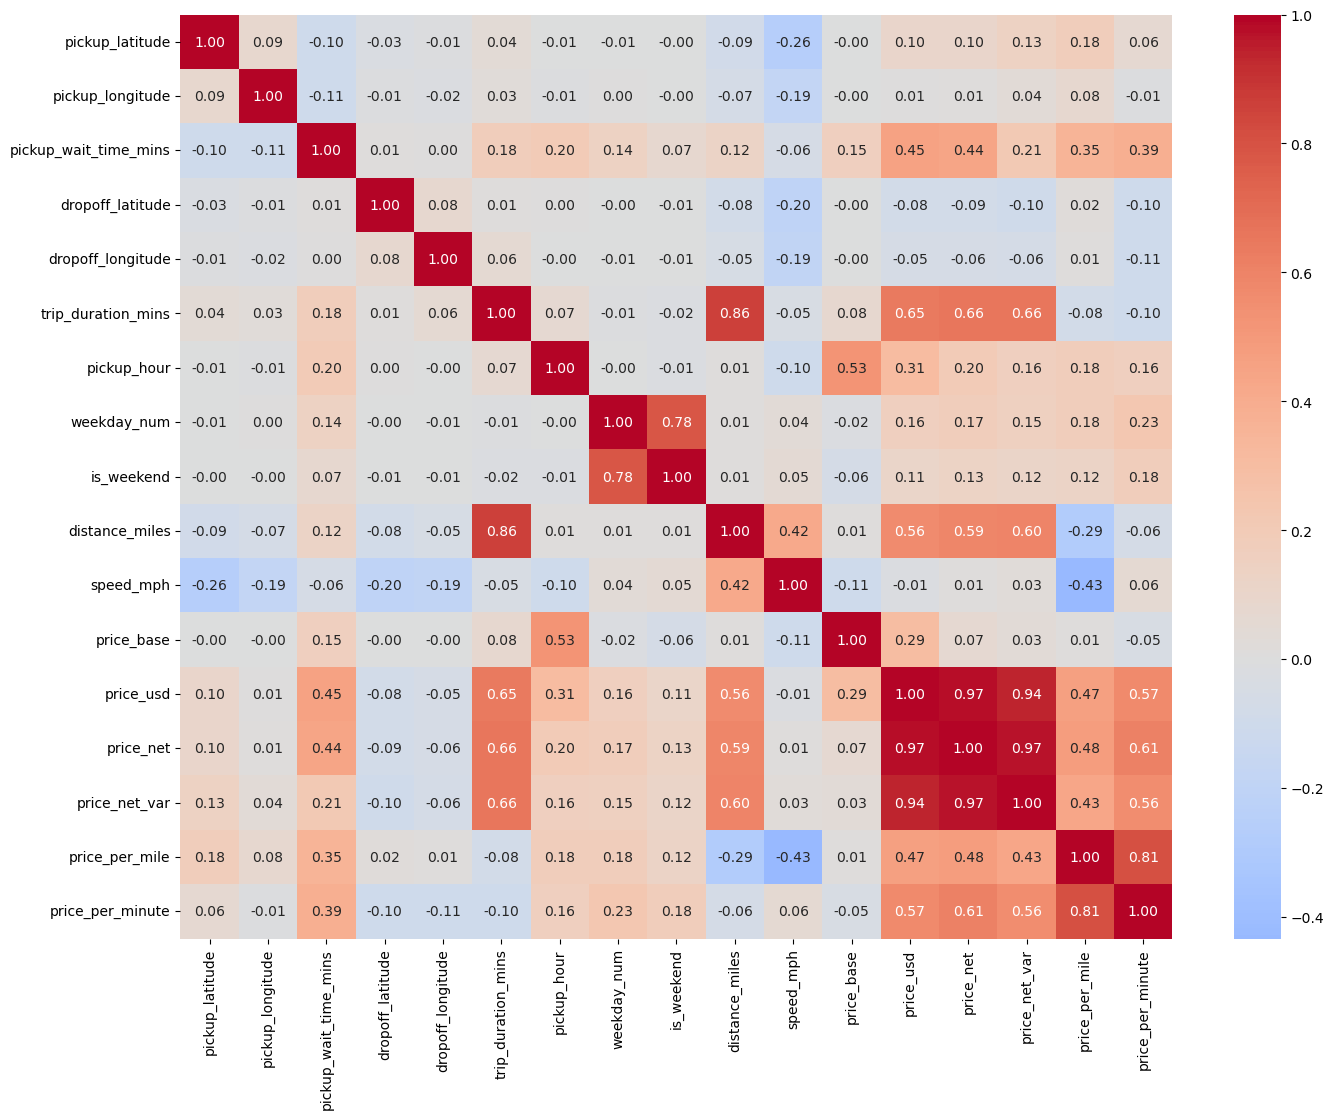

In [219]:
plt.figure(figsize = (16,12))
#picking out the price columns
price_cols = ['price_usd', 'price_net', 'price_net_var', 'price_per_mile', 'price_per_minute']
# grabbing all the other columns exclude the price related 
other_cols = [c for c in df_clean.columns if c not in price_cols]
# summing up the  columns
cols = other_cols + price_cols
# computing the corr matrix on that ordering
corr = df_clean[cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", center=0, cmap = "coolwarm")